# **Changing background of image using stable diffusion**

## Importing dependencies

In [ ]:
!pip install rembg
!pip install accelerate
!pip install diffusers==0.24

In [ ]:
import rembg
import torch
import numpy as np
from PIL import Image,ImageOps
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid
from diffusers import StableDiffusionInpaintPipeline
import torch


##Loading data

In [7]:
# Load the input image
init_image = load_image("/content/example5.jpg").resize((512,768))

# Convert the input image to a numpy array
input_array = np.array(init_image)

# Extract mask using rembg
mask_array = rembg.remove(input_array, only_mask=True)

# Create a PIL Image from the output array
mask_image = Image.fromarray(mask_array)

## Inverted Masking the image

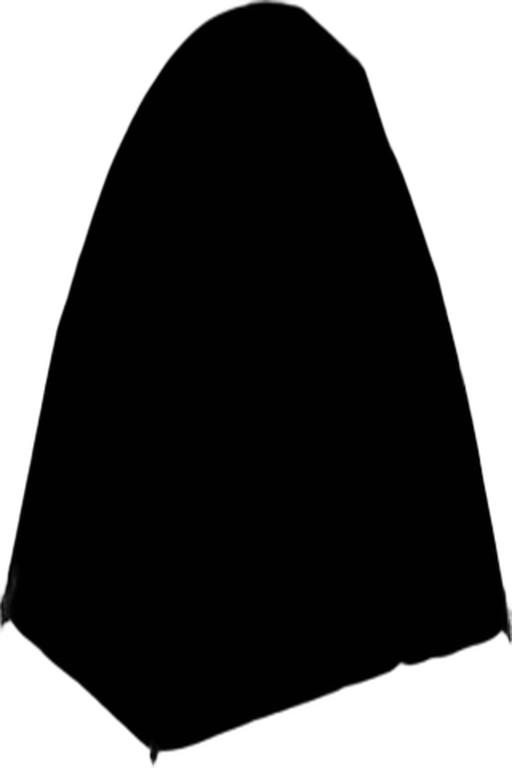

In [8]:
mask_image_inverted = ImageOps.invert(mask_image)

# Display inverted mask
mask_image_inverted

##Loading stable diffusion model

In [ ]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")



## Defining the prompt And setting pipeline attributes

In [ ]:
prompt = """A vibrant, colorful tent set against a breathtaking mountain backdrop. The scene captures the majestic peaks towering in the distance, with soft clouds drifting lazily overhead. The sun is setting, casting a warm golden hue over the landscape, highlighting the rugged terrain and lush greenery surrounding the tent. The fabric of the tent is billowing gently in the cool mountain breeze, creating a sense of adventure and tranquility. The foreground features wildflowers in bloom, adding splashes of color to the scene. The image has a high-quality rendering, reminiscent of a serene outdoor escape, with a focus on natural beauty and a peaceful ambiance."""



image = pipe(prompt=prompt,

             width=512,
             height=768,
             num_inference_steps=200,
             image=init_image,
             mask_image=mask_image_inverted,
             generator=torch.manual_seed(189018)).images[0]



# prompt = """A vibrant, colorful tent set against a breathtaking mountain backdrop. The scene captures the majestic peaks towering in the distance, with soft clouds drifting lazily overhead. The sun is setting, casting a warm golden hue over the landscape, highlighting the rugged terrain and lush greenery surrounding the tent. The fabric of the tent is billowing gently in the cool mountain breeze, creating a sense of adventure and tranquility. The foreground features wildflowers in bloom, adding splashes of color to the scene. The image has a high-quality rendering, reminiscent of a serene outdoor escape, with a focus on natural beauty and a peaceful ambiance."""

# image = pipe(prompt).images[0]

##Displaying output Image

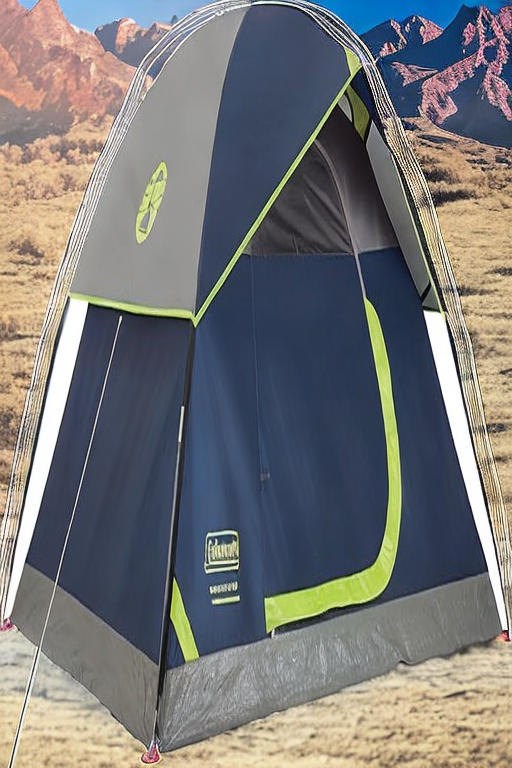

In [11]:
image

# **Image to video**

In [12]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

pipeline = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()

image1 = load_image(image)
image1 = image.resize((1024, 576))

generator = torch.manual_seed(42)
frames = pipeline(image1, decode_chunk_size=8, generator=generator).frames[0]
export_to_video(frames, "generated.mp4", fps=7)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

'generated.mp4'